In [2]:
import keras
import random
import collections
import numpy as np
import tensorflow.keras as tk
import matplotlib.pyplot as plt

def display_random_images_with_labels(d, n=10):
    choices = list(range(len(d[0])))
    for i in range(n):
        index = random.choice(choices)
        choices.remove(index)
        print("index:",index)
        print("Lable:",d[1][index])
        plt.imshow(d[0][index], cmap='gray')
        plt.show()

# Loading dataset
dataset = keras.datasets.mnist.load_data()


11490434/11490434 [==============================] - 0s 0us/step


In [46]:
print("There are",len(dataset[0][0]),"images in training dataset")

print("There are",len(dataset[1][0]),"images in testing dataset")
print(dataset[0][0].shape)
print(dataset[1][0].shape)
train_set =dataset[0][0]
test_set = dataset[1][0]

There are 60000 images in training dataset
There are 10000 images in testing dataset
(60000, 28, 28)
(10000, 28, 28)


In [ ]:
print(dataset[0][0][0].shape)

(28, 28)


Randomly printing 10 images with labels from training dataset
index: 18447
Lable: 6


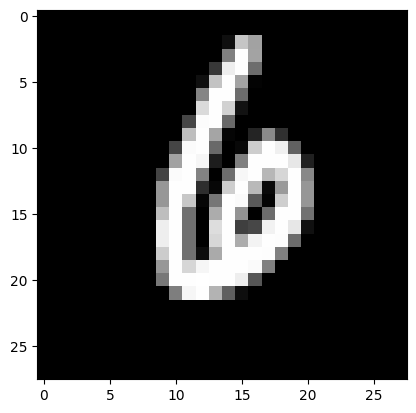

index: 58795
Lable: 4


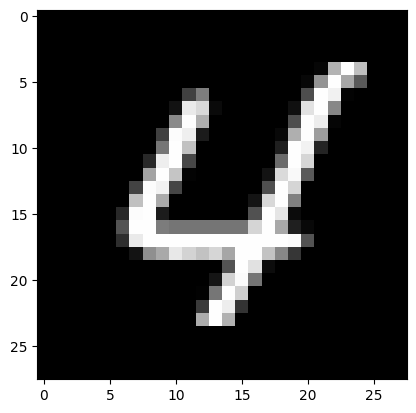

index: 7349
Lable: 1


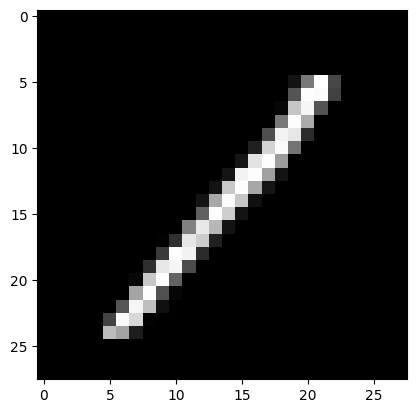

index: 53190
Lable: 9


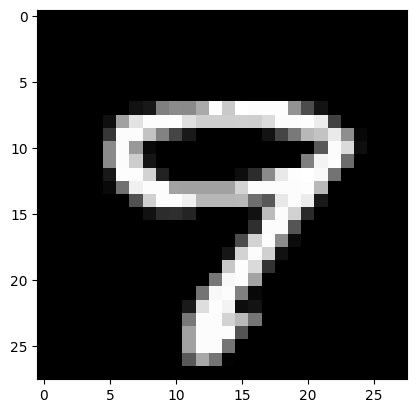

index: 31506
Lable: 2


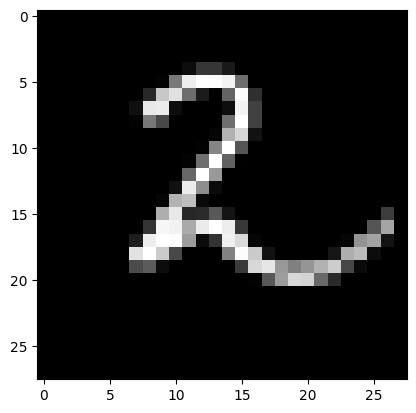

index: 29467
Lable: 4


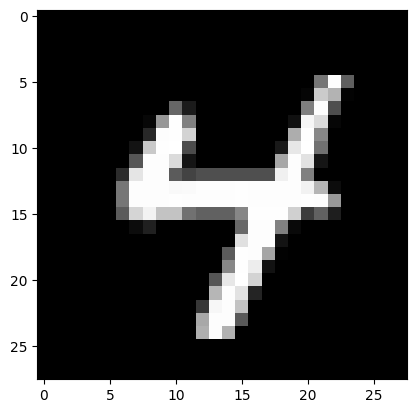

index: 46522
Lable: 5


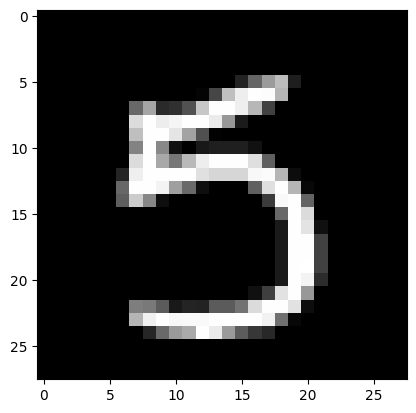

index: 29262
Lable: 0


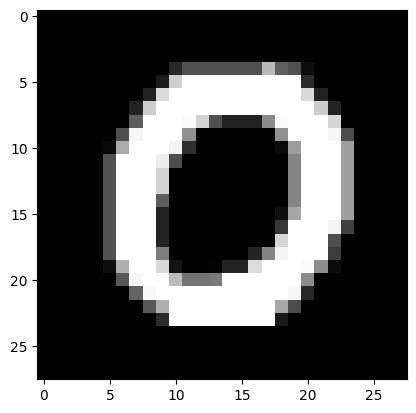

index: 1033
Lable: 2


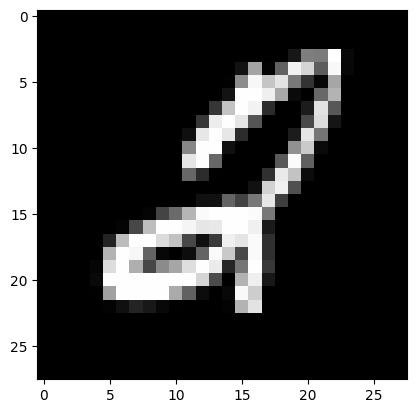

index: 4481
Lable: 8


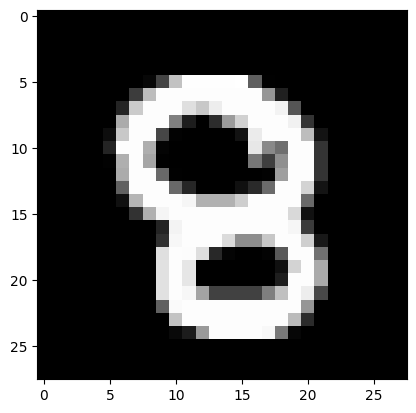

___________________


In [ ]:
print("Randomly printing 10 images with labels from training dataset")

display_random_images_with_labels(dataset[0])

print("___________________")

In [ ]:
print("There are",len(dataset[0][1]),"labels in training dataset for",len(dataset[0][0]),"images in training dataset")

print("There are",len(dataset[1][1]),"labels in training dataset for",len(dataset[1][0]),"images in training dataset")

print("___________________")

There are 60000 labels in training dataset for 60000 images in training dataset
There are 10000 labels in training dataset for 10000 images in training dataset
___________________


In [ ]:
print("There are", len(set(dataset[0][1])),"unique classes in training dataset")

print("Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)")

display(collections.Counter(dataset[0][1]))

print("There are", len(set(dataset[1][1])),"unique classes in validation dataset")

print("Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)")

display(collections.Counter(dataset[1][1]))

print("__________")

There are 10 unique classes in training dataset
Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)


Counter({5: 5421,
         0: 5923,
         4: 5842,
         1: 6742,
         9: 5949,
         2: 5958,
         3: 6131,
         6: 5918,
         7: 6265,
         8: 5851})

There are 10 unique classes in validation dataset
Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)


Counter({7: 1028,
         2: 1032,
         1: 1135,
         0: 980,
         4: 982,
         9: 1009,
         5: 892,
         6: 958,
         3: 1010,
         8: 974})

__________


In [53]:
X_train, y_train = dataset[0]
X_test, y_test = dataset[1]


new_X_train = []
new_y_train = []
new_X_test = []
new_y_test = []

#  number of samples for each class
num_samples = 600


for class_label in range(10):
    # Get indices of images
    class_indices = np.where(y_train == class_label)[0]
    np.random.shuffle(class_indices)
    new_X_train.extend(X_train[class_indices[:num_samples]])
    new_y_train.extend(y_train[class_indices[:num_samples]])
    
    # Get indices of images 
    class_indices = np.where(y_test == class_label)[0]
    np.random.shuffle(class_indices)
    # Add  100 indices 
    new_X_test.extend(X_test[class_indices[:100]])
    new_y_test.extend(y_test[class_indices[:100]])


new_X_train = np.array(new_X_train)
new_y_train = np.array(new_y_train)
new_X_test = np.array(new_X_test)
new_y_test = np.array(new_y_test)

# new data set
new_dataset = ((new_X_train, new_y_train), (new_X_test, new_y_test))

In [54]:
# Checking the shape of first image in new training dataset
print(new_dataset[0][0][0].shape)
print("___________________")

# Checking the size of dataset
print("There are",len(new_dataset[0][1]),"labels in training dataset for",len(new_dataset[0][0]),"images in training dataset")
print("There are",len(new_dataset[1][1]),"labels in validation dataset for",len(new_dataset[1][0]),"images in validation dataset")
print("___________________")

# Checking the number of images per class
print("There are", len(set(new_dataset[0][1])),"unique classes in training dataset")
print("Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)")
display(collections.Counter(new_dataset[0][1]))
print("There are", len(set(new_dataset[1][1])),"unique classes in validation dataset")
print("Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)")
display(collections.Counter(new_dataset[1][1]))


(28, 28)
___________________
There are 6000 labels in training dataset for 6000 images in training dataset
There are 1000 labels in validation dataset for 1000 images in validation dataset
___________________
There are 10 unique classes in training dataset
Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)


Counter({0: 600,
         1: 600,
         2: 600,
         3: 600,
         4: 600,
         5: 600,
         6: 600,
         7: 600,
         8: 600,
         9: 600})

There are 10 unique classes in validation dataset
Breakdown of each labels is below (format: dict key is label, dict value is occurrence of that label/ number of images for that label)


Counter({0: 100,
         1: 100,
         2: 100,
         3: 100,
         4: 100,
         5: 100,
         6: 100,
         7: 100,
         8: 100,
         9: 100})